Exercicio:

In [ ]:
# Crie classificadores de Naive Bayes e de regressão logística;
# Realize validações cruzadas em ambos os modelos para selecionar os melhores modelos treinados;
# Criar a matriz de confusão para mostrar as diferenças entre parâmetros
# Salvar o melhor modelo usando a biblioteca Pickle Python (consulte este link para referência)

Importações Básicas

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression #denovo regressão importada por via das duvidas
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression #regressão logistica
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import pickle
import matplotlib.pyplot as plt

banknote_dataset = pd.read_csv("data_banknote_authentication.txt", header = None)
banknote_dataset.head(10)

,0,1,2,3,4
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


Ajustando Scaler

In [6]:
X = banknote_dataset.iloc[:, :-1]
y = banknote_dataset.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Iniciando Modelos

In [24]:
naive_bayes_model = GaussianNB()
logistic_model = LogisticRegression(solver='liblinear')

#Validação Cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
naive_scores = cross_val_score(naive_bayes_model, X_scaled, y, cv=kf, scoring='accuracy')
logistic_scores = cross_val_score(logistic_model, X_scaled, y, cv=kf, scoring='accuracy')

print("Naive Bayes -> Acurácia média: {:.4f}".format(np.mean(naive_scores)))
print("Regressão Logística -> Acurácia média: {:.4f}".format(np.mean(logistic_scores)))


Naive Bayes -> Acurácia média: 0.8411
Regressão Logística -> Acurácia média: 0.9810


Separação Teste/Treino

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
naive_bayes_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Previsões

In [34]:
y_pred_nb = naive_bayes_model.predict(X_test)
y_pred_log = logistic_model.predict(X_test)


Matriz de Confusão

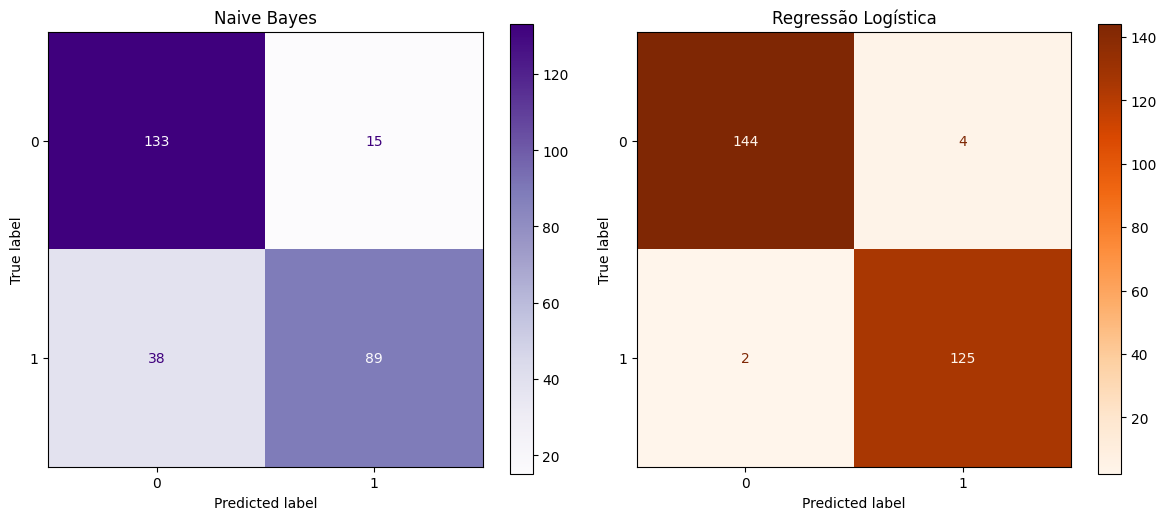

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_log = confusion_matrix(y_test, y_pred_log)

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=[0, 1])
disp1.plot(ax=axes[0], cmap='Purples')
axes[0].set_title('Naive Bayes')

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=[0, 1])
disp2.plot(ax=axes[1], cmap='Oranges')
axes[1].set_title('Regressão Logística')

plt.tight_layout()
plt.show()

Salvar modelo com Pickle

In [36]:
melhor_modelo = logistic_model if np.mean(logistic_scores) > np.mean(naive_scores) else naive_bayes_model
nome_arquivo = 'modelo_banco_melhor.pkl'

with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(melhor_modelo, arquivo)

print(f"\nModelo salvo como: {nome_arquivo}")


Modelo salvo como: modelo_banco_melhor.pkl
